In [19]:
import numpy as np
import matplotlib.pyplot as plt
import helmeos
import pandas as pd

In [20]:
gconst = 6.67430e-8
clight = 2.99792458e10
solar = 1.98847e33
lencgs2code = (clight**2)/(solar*gconst)
masscgs2code = (1.0e0/solar)
rhocgs2code = (masscgs2code/lencgs2code**3)
tcgs2code = (clight**3)/(solar*gconst)
energycgs2code = (1.0E0/clight**2)
me2 = 9.1093837015e-28*masscgs2code
mb2 = 1.66053906660e-24*masscgs2code
ye = 0.5e0
h_bar = (1.054571817e-27)*(lencgs2code**2*masscgs2code/tcgs2code)
amax = (me2**4)/(2.4e1*np.pi**2*h_bar**3)
bmax = (mb2*me2**3)/(3.0e0*np.pi**2*h_bar**3*ye)
def xe(rho):
    return (rho/bmax)**(1.0e0/3.0e0)
def dpdx(x):
    return 8.0e0*x**4/np.sqrt(x**2 + 1.0e0)
def cs(rho):
    return np.sqrt(amax*dpdx(xe(rho))/3.0e0/(rho**2*bmax)**(1.0e0/3.0e0))

In [21]:
atmosphere_rho = 1.6193113417486485E-016
atmosphere_eps =  1.8948692839891130E-005
atmosphere_pres =  1.5764116163599139E-021
atmosphere_abar = 4
atmosphere_zbar = 2
atmosphere_ye = 0.5

In [22]:
vars_to_print = ['etot', 'ptot', 'cs', 'sele']

# defining inputs
density = np.logspace(-12, 15, num=1000) # g/cc
temperature = 100000000  # K
abar = 13.75358166189112
zbar = 6.876790830945558

# format string
fmt = ("{:s}: " + "{:g}, " * len(density))[:-1]

# easiest way to call EOS
print("~ Easy call ~")
out = helmeos.eos_DT(density, temperature, abar, zbar)
for i in vars_to_print:
    print(fmt.format(i, *out[i]))
print()

~ Easy call ~
etot: 7.56577e+29, 7.10929e+29, 6.68035e+29, 6.27729e+29, 5.89854e+29, 5.54266e+29, 5.20824e+29, 4.894e+29, 4.59872e+29, 4.32125e+29, 4.06053e+29, 3.81554e+29, 3.58533e+29, 3.369e+29, 3.16574e+29, 2.97473e+29, 2.79525e+29, 2.6266e+29, 2.46812e+29, 2.31921e+29, 2.17928e+29, 2.04779e+29, 1.92424e+29, 1.80814e+29, 1.69904e+29, 1.59653e+29, 1.5002e+29, 1.40969e+29, 1.32464e+29, 1.24471e+29, 1.16961e+29, 1.09904e+29, 1.03273e+29, 9.70423e+28, 9.11872e+28, 8.56854e+28, 8.05156e+28, 7.56577e+28, 7.10929e+28, 6.68035e+28, 6.27729e+28, 5.89854e+28, 5.54266e+28, 5.20824e+28, 4.894e+28, 4.59872e+28, 4.32125e+28, 4.06053e+28, 3.81554e+28, 3.58533e+28, 3.369e+28, 3.16574e+28, 2.97473e+28, 2.79525e+28, 2.6266e+28, 2.46812e+28, 2.31921e+28, 2.17928e+28, 2.04779e+28, 1.92424e+28, 1.80814e+28, 1.69904e+28, 1.59653e+28, 1.5002e+28, 1.40969e+28, 1.32464e+28, 1.24471e+28, 1.16961e+28, 1.09904e+28, 1.03273e+28, 9.70423e+27, 9.11872e+27, 8.56854e+27, 8.05156e+27, 7.56577e+27, 7.10929e+27, 6.68

In [23]:
rhocs_list = []
rhopress_list = []
rhoeps_list = []
rhoepsbfup_list = []
rhotemp_list = []
rhotempbfup_list = []
rhoinverttemp_list = []
n = 1
for i in range(n):
    rhoepsbfup = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_eps_bfup"+str(i)+".dat",delim_whitespace=True))
    rhoepsbfup_list.append(rhoepsbfup)
    rhotempbfup = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_temp_bfup"+str(i)+".dat",delim_whitespace=True))
    rhotempbfup_list.append(rhotempbfup)
    # rhocs = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_cs"+str(i)+".dat",delim_whitespace=True))
    # rhocs_list.append(rhocs)
    # rhopress = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_press"+str(i)+".dat",delim_whitespace=True))
    # rhopress_list.append(rhopress)
    # rhoeps = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_eps"+str(i)+".dat",delim_whitespace=True))
    # rhoeps_list.append(rhoeps)
    rhotemp = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_temp"+str(i)+".dat",delim_whitespace=True))
    rhotemp_list.append(rhotemp)
# prim = np.array(pd.read_csv("/home/cnchong/Codes/Ia_cumc3d/model/star/prim.dat",delim_whitespace=True))

/tmp/ipykernel_15394/4203262515.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rhoepsbfup = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_eps_bfup"+str(i)+".dat",delim_whitespace=True))
/tmp/ipykernel_15394/4203262515.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rhotempbfup = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_temp_bfup"+str(i)+".dat",delim_whitespace=True))
/tmp/ipykernel_15394/4203262515.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rhotemp = np.array(pd.read_csv("/home/cnchong/Codes/cumc3d/model/Type_Ia/rho_temp"+str(i)+".dat",delim_whitespace=True))


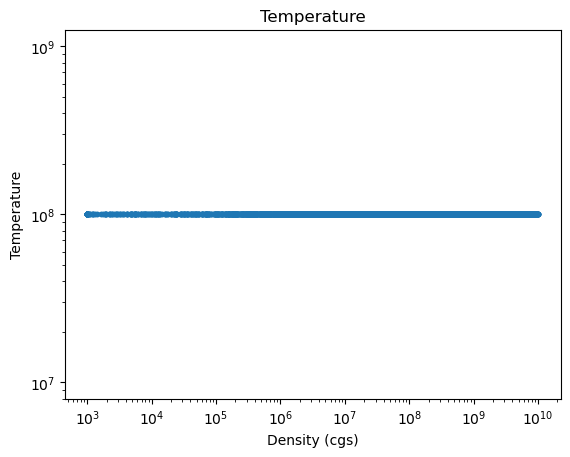

In [25]:
cmap = plt.colormaps.get_cmap('binary')
# colors = cmap(np.arange(n)/(n-1))
for i in range(n):
    plt.loglog(rhotempbfup_list[i][:,0]/rhocgs2code, rhotempbfup_list[i][:,1]*1e9, '.', label=i)
    # plt.axvline(x=atmosphere_rho/rhocgs2code, color = 'purple', linestyle = 'dashed')
    # plt.axhline(y=1e8, color = 'red', linestyle = 'dashed')
    # plt.xlim(left=atmosphere_rho/rhocgs2code)
    plt.xlabel('Density (cgs)')
    plt.ylabel('Temperature')
    plt.title('Temperature')

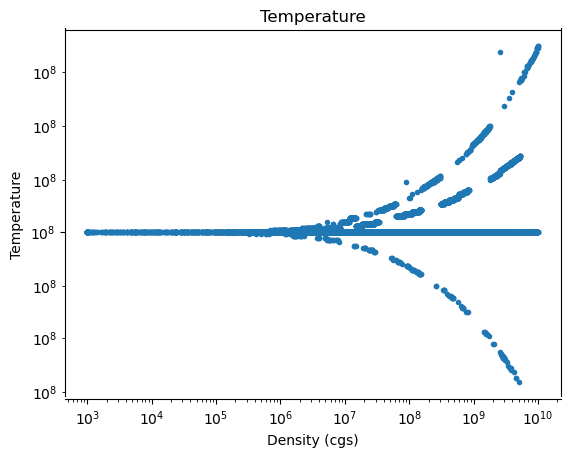

In [26]:
cmap = plt.colormaps.get_cmap('binary')
# colors = cmap(np.arange(n)/(n-1))
for i in range(n):
    plt.loglog(rhotemp_list[i][:,0]/rhocgs2code, rhotemp_list[i][:,1]*1e9, '.', label=i)
    # plt.xlim(left=atmosphere_rho/rhocgs2code)
    plt.xlabel('Density (cgs)')
    plt.ylabel('Temperature')
    plt.title('Temperature')

/tmp/ipykernel_15394/2593075107.py:2: RuntimeWarning: invalid value encountered in divide
  colors = cmap(np.arange(n)/(n-1))


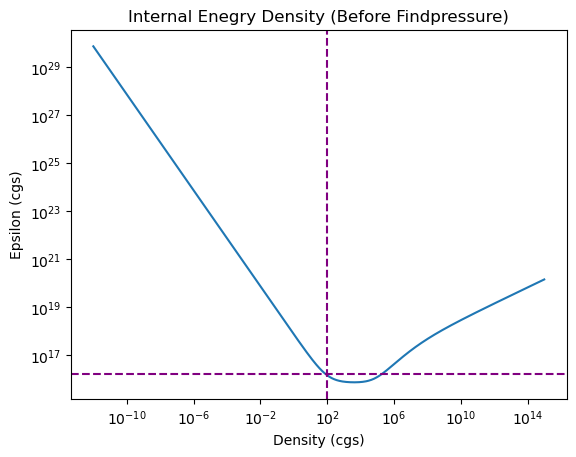

In [27]:
cmap = plt.colormaps.get_cmap('plasma')
colors = cmap(np.arange(n)/(n-1))
plt.loglog(density, out['etot'])
for i in range(n):
    plt.plot(atmosphere_rho/rhocgs2code, atmosphere_eps/energycgs2code, label='atmosphere')
    plt.loglog(rhoepsbfup_list[i][:,0]/rhocgs2code, rhoepsbfup_list[i][:,1]/energycgs2code, '.', label=i, c = colors[i])
    plt.axvline(x=atmosphere_rho/rhocgs2code, color = 'purple', linestyle = 'dashed')
    plt.axhline(y=atmosphere_eps/energycgs2code, color = 'purple', linestyle = 'dashed')
    # plt.xlim(left=atmosphere_rho/rhocgs2code)
    plt.xlabel('Density (cgs)')
    plt.ylabel('Epsilon (cgs)')
    plt.title('Internal Enegry Density (Before Findpressure)')

/tmp/ipykernel_15394/4059353032.py:2: RuntimeWarning: invalid value encountered in divide
  colors = cmap(np.arange(n)/(n-1))


IndexError: list index out of range

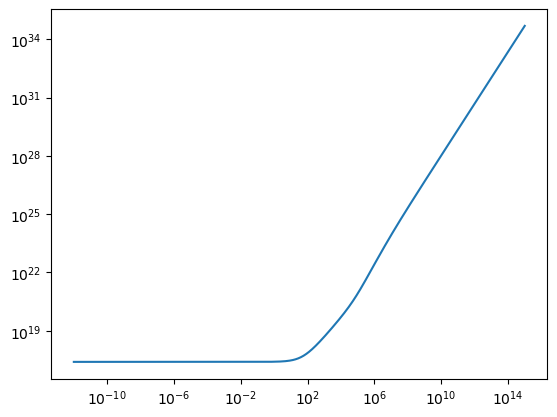

In [10]:
cmap = plt.colormaps.get_cmap('binary')
colors = cmap(np.arange(n)/(n-1))
plt.loglog(density, out['ptot'])
for i in range(n):
    plt.loglog(rhopress_list[i][:,0]/rhocgs2code, rhopress_list[i][:,1]/(masscgs2code*energycgs2code/lencgs2code**3), '.', label=i, c = colors[i])
    plt.axvline(x=atmosphere_rho/rhocgs2code, color = 'purple', linestyle = 'dashed')
    # plt.xlim(left=atmosphere_rho/rhocgs2code)
    plt.xlabel('Density (cgs)')
    plt.ylabel('Pressure (cgs)')
    plt.title('Pressure')

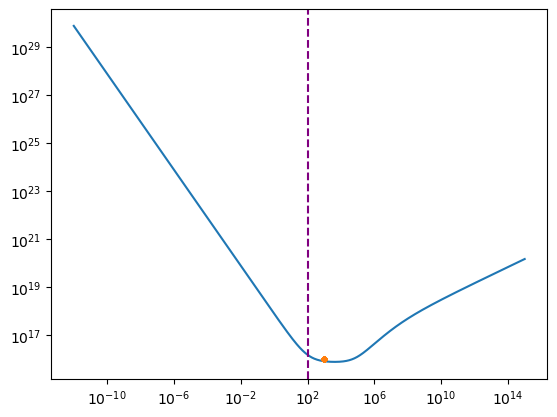

In [ ]:
t = 11
plt.loglog(density, out['etot'])
plt.loglog(rhoeps_list[t][:,0]/rhocgs2code, rhoeps_list[t][:,1]/energycgs2code, '.')
plt.axvline(x=atmosphere_rho/rhocgs2code, color = 'purple', linestyle = 'dashed')

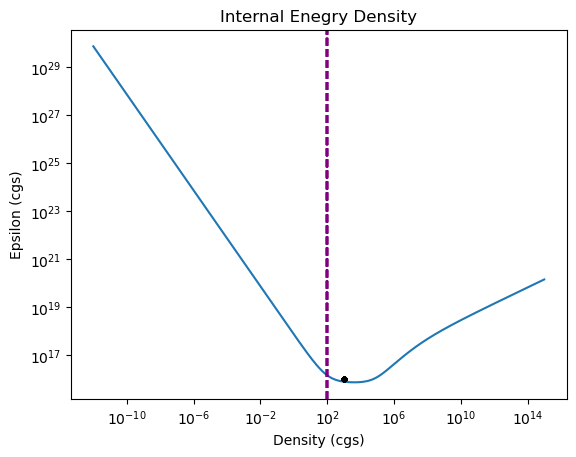

In [ ]:
cmap = plt.colormaps.get_cmap('binary')
colors = cmap(np.arange(n)/(n-1))
plt.loglog(density, out['etot'])
for i in range(n):
    plt.loglog(rhoeps_list[i][:,0]/rhocgs2code, rhoeps_list[i][:,1]/energycgs2code, '.', label=i, c = colors[i])
    plt.axvline(x=atmosphere_rho/rhocgs2code, color = 'purple', linestyle = 'dashed')
    # plt.xlim(left=atmosphere_rho/rhocgs2code)
    plt.xlabel('Density (cgs)')
    plt.ylabel('Epsilon (cgs)')
    plt.title('Internal Enegry Density')

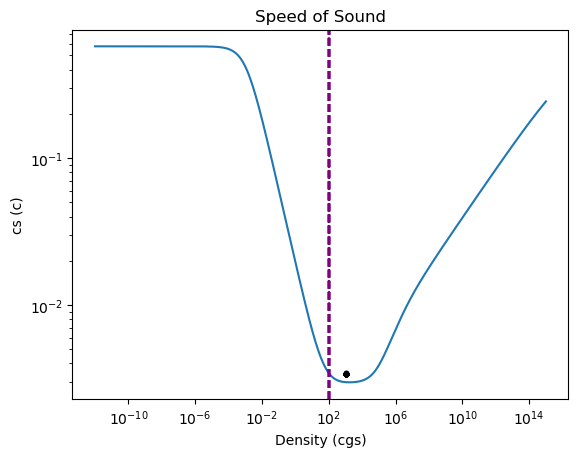

In [ ]:
cmap = plt.colormaps.get_cmap('binary')
colors = cmap(np.arange(n)/(n-1))
plt.loglog(density, out['cs']/clight)
for i in range(n):
    plt.loglog(rhocs_list[i][:,0]/rhocgs2code, rhocs_list[i][:,1], '.', label=i, c = colors[i])
    plt.axvline(x=atmosphere_rho/rhocgs2code, color = 'purple', linestyle = 'dashed')
    # plt.xlim(left=atmosphere_rho/rhocgs2code)
    plt.xlabel('Density (cgs)')
    plt.ylabel('cs (c)')
    plt.title('Speed of Sound')